In [1]:
## Import Ticker class from yahooquery library 
# To access data from yahooquery, an argument (Company ticker symbol) is passed to the Ticker class 

from yahooquery import Ticker
import pandas as pd

In [8]:
## Create instance of Ticker class (Company ticker symbol)

WES_ASX = Ticker(['VOO'])

In [59]:
# Select History from Ticker class, this will return a DataFrame of historical stock price data 
# A period of 5 years has been selected for historical analysis 

stockPrice = WES_ASX.history(period="max")

# Print results 

stockPrice = stockPrice.reset_index()

In [60]:
stockPrice

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,VOO,2010-09-09,102.500000,102.500000,101.139999,101.320000,26500,79.681946,0.0,0.0
1,VOO,2010-09-10,101.680000,101.860001,101.300003,101.779999,8600,80.043701,0.0,0.0
2,VOO,2010-09-13,102.959999,103.139999,102.500000,103.059998,33750,81.050339,0.0,0.0
3,VOO,2010-09-14,102.839996,103.480003,102.379997,103.040001,59400,81.034607,0.0,0.0
4,VOO,2010-09-15,102.620003,103.379997,102.400002,103.300003,9250,81.239075,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3209,VOO,2023-06-09,395.049988,396.929993,394.079987,395.029999,3060100,395.029999,0.0,0.0
3210,VOO,2023-06-12,395.980011,398.690002,395.299988,398.660004,3792700,398.660004,0.0,0.0
3211,VOO,2023-06-13,400.019989,401.850006,399.399994,401.290009,3913100,401.290009,0.0,0.0
3212,VOO,2023-06-14,401.609985,403.440002,398.459991,401.600006,5161300,401.600006,0.0,0.0


<AxesSubplot:xlabel='date'>

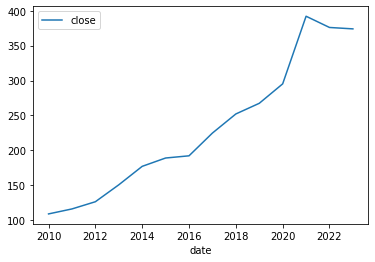

In [61]:
stockPrice['date'] = pd.to_datetime(stockPrice['date'])

averageClose = pd.DataFrame(stockPrice.groupby(stockPrice.date.dt.year)['close'].mean())

plot = averageClose.plot.line()

plot

<AxesSubplot:ylabel='date'>

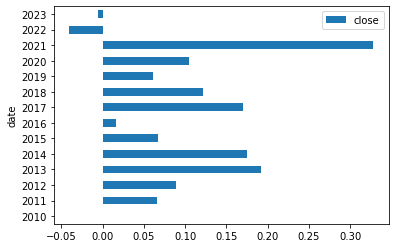

In [62]:
annualDelta = averageClose.pct_change()

bar = annualDelta.plot.barh()

bar

In [63]:
averageReturn = annualDelta['close'].mean()*100

averageReturn.round(2)

10.33